## World Happiness Report Data Analysis (2015-2022)

This file is only supporting the main analysis that is available in the form of a data story here: https://ibtassam.notion.site/Unpacking-the-World-Happiness-Report-data-for-period-2015-2022-f491a71c9d204e1784d3f28438d181f2

Below I explore the various correlations between happiness score and the various categories that 'World Happiness Report' uses to quantify happiness in their annual reports.

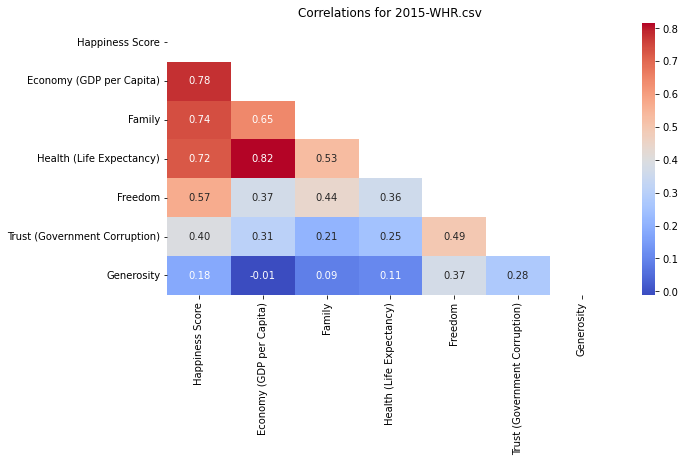

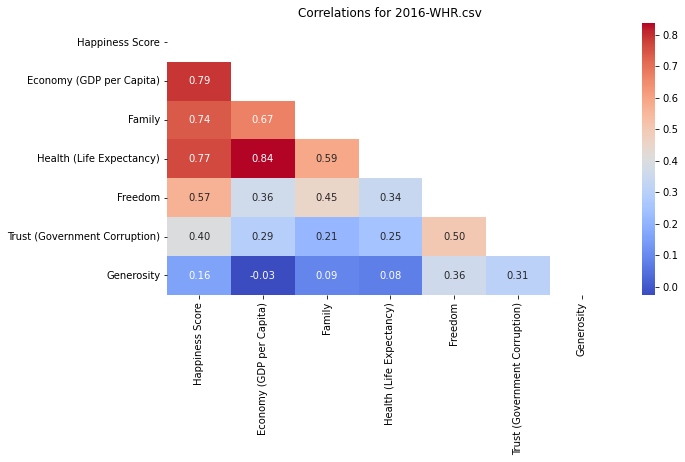

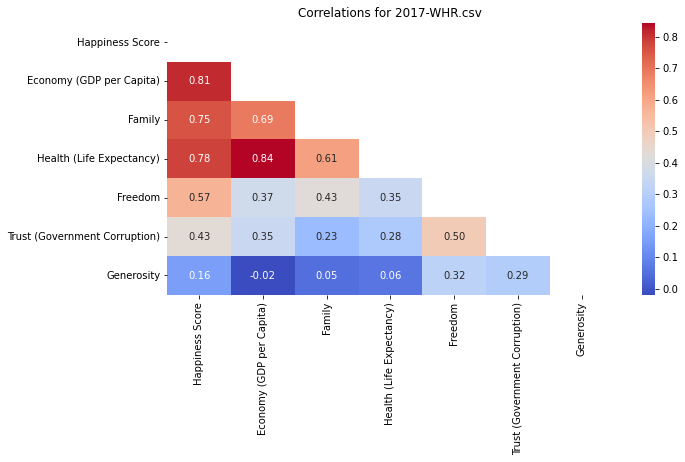

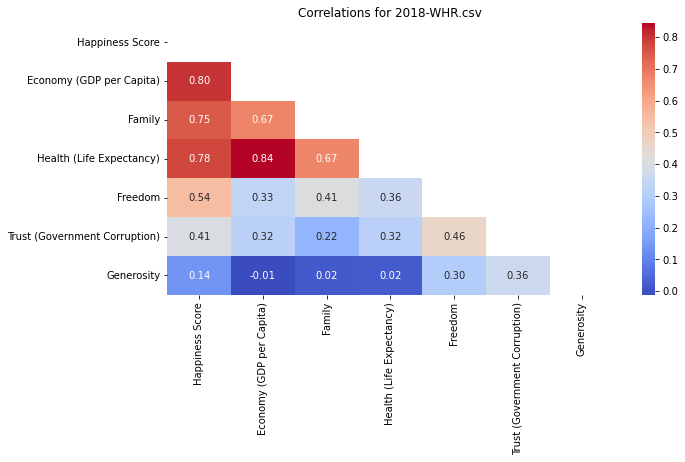

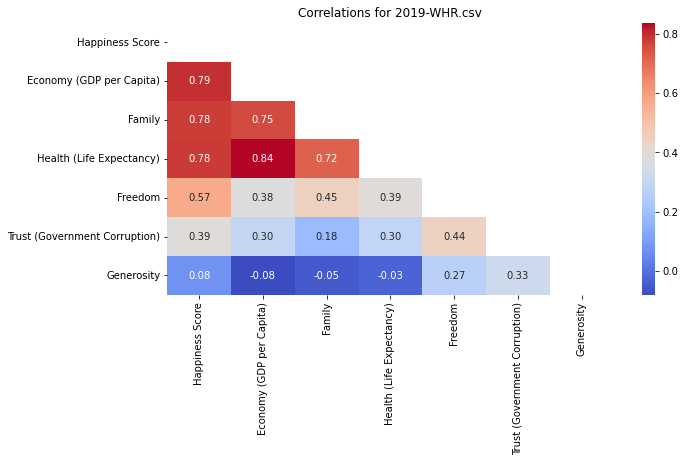

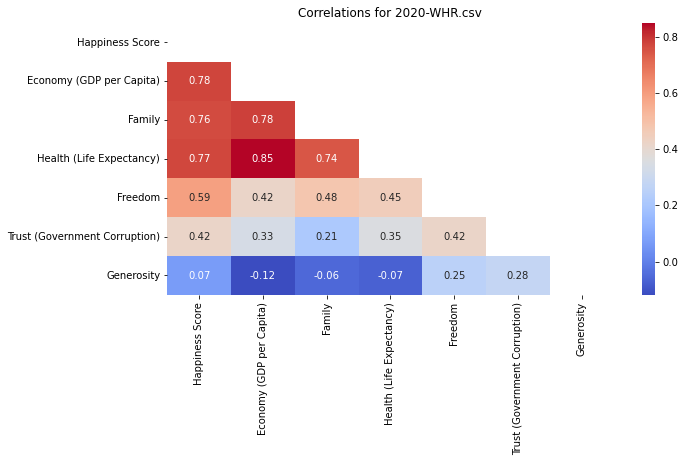

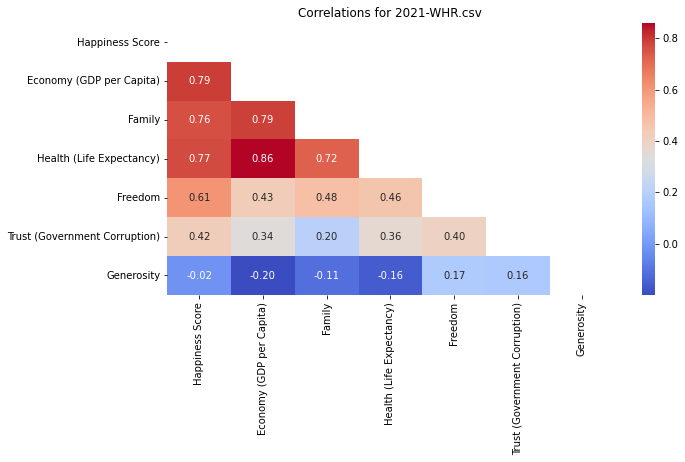

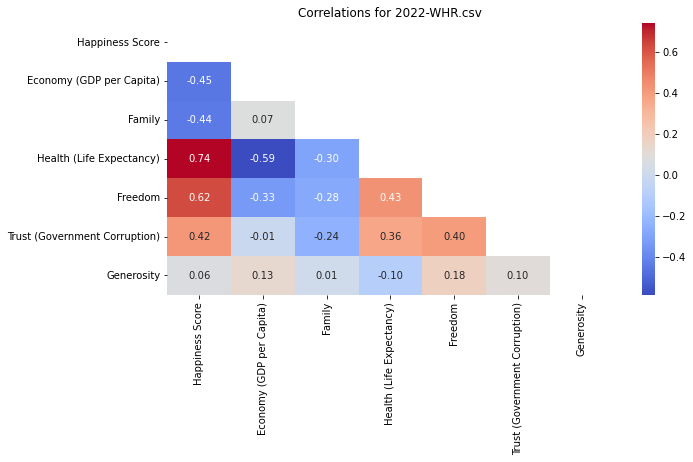

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folder_path = '/Users/ibtassam/Downloads/DSMLC project/Viz4 Correlation/Temp'
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
for file_name in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file_name))
    df = df.iloc[:, 2:]
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Plot the heatmap for the correlation matrix
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax, mask=mask)
    ax.set_title('Correlations for {}'.format(file_name))
    plt.show()


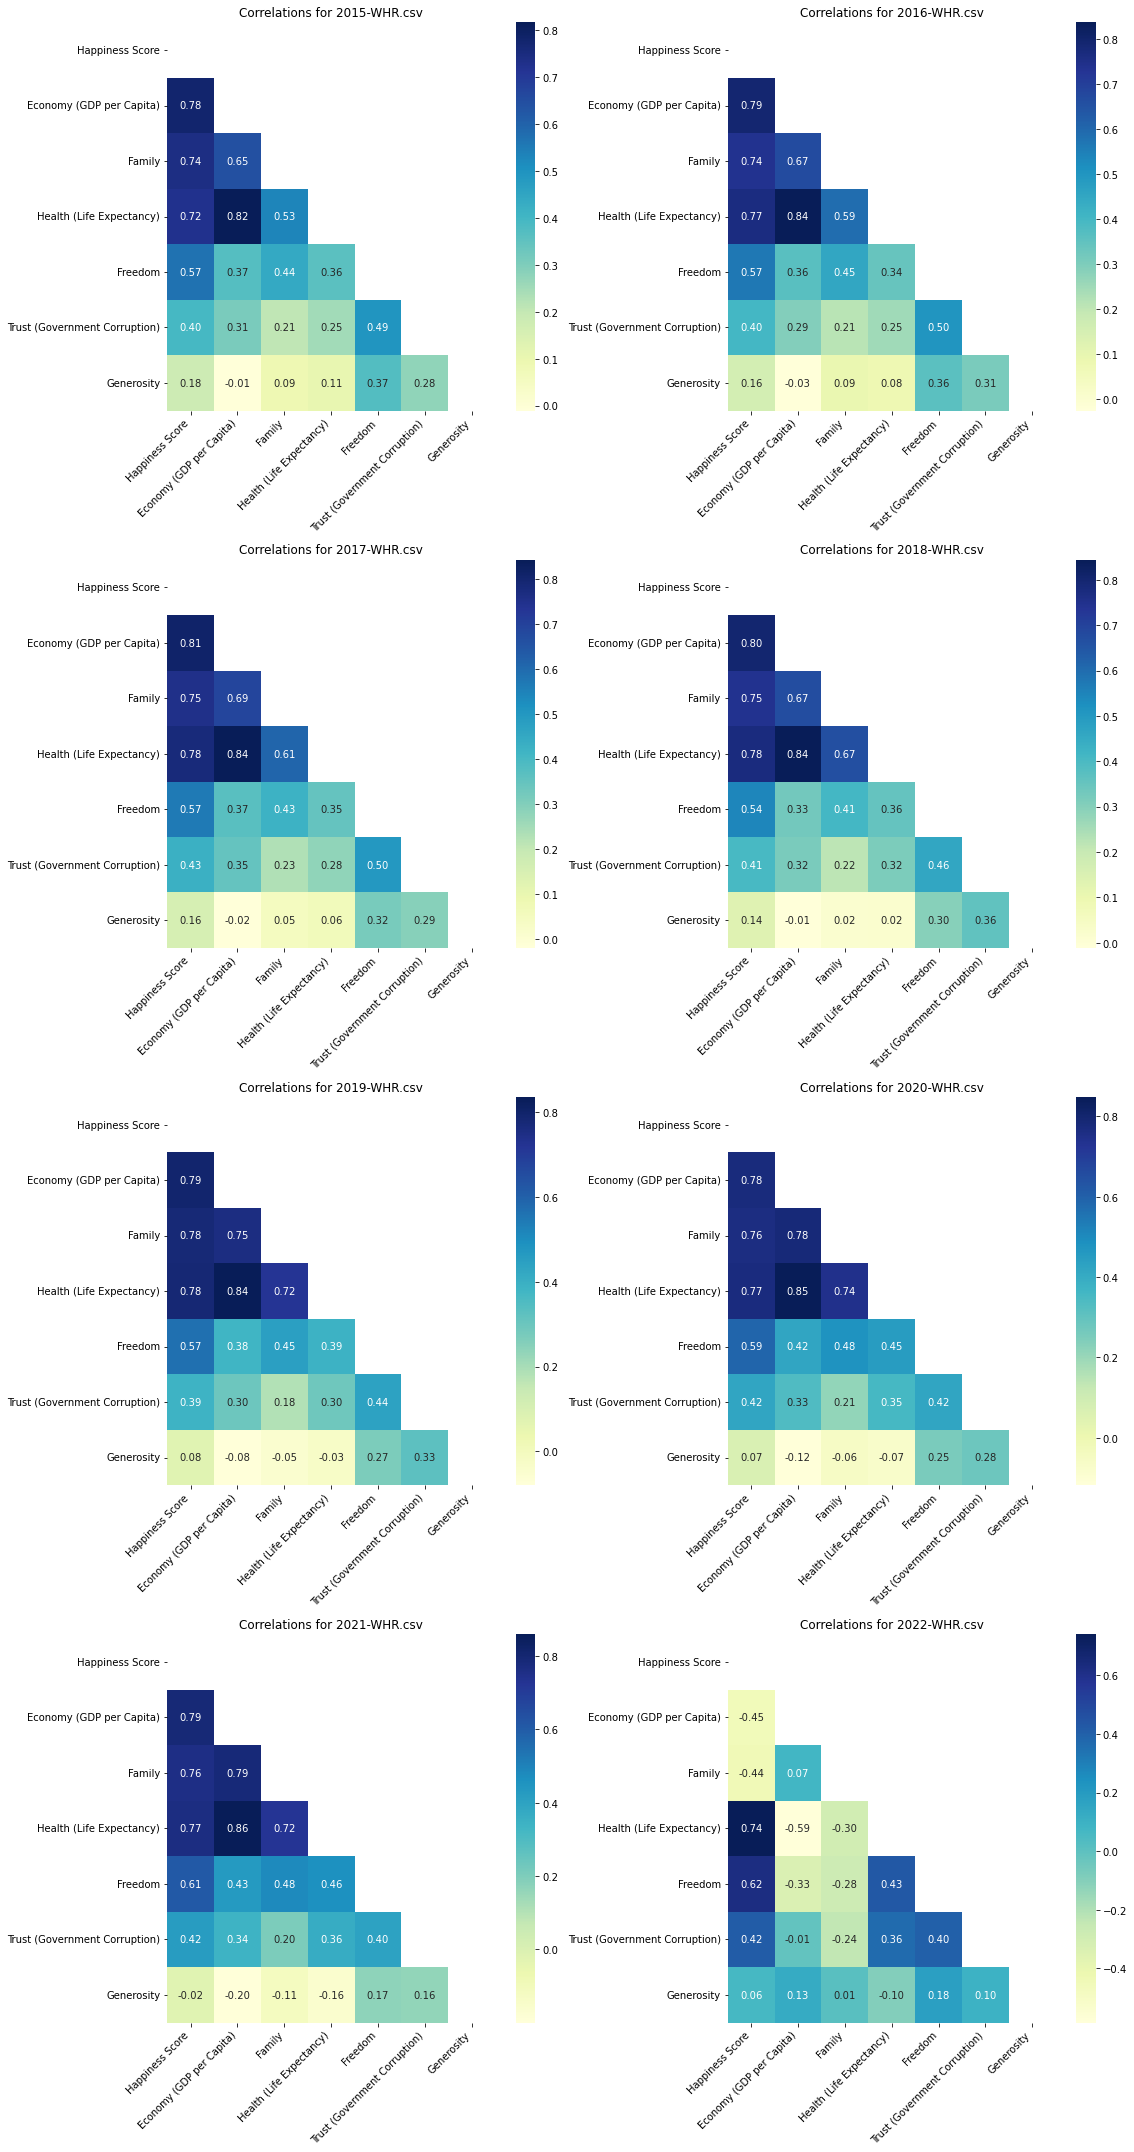

In [11]:
#Same charts as above but plotted in a grid
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folder_path = '/Users/ibtassam/Downloads/DSMLC project/Viz4 Correlation/Temp'
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
fig, axs = plt.subplots(4, 2, figsize=(16, 30))

for i, file_name in enumerate(csv_files):
    df = pd.read_csv(os.path.join(folder_path, file_name))
    df = df.iloc[:, 2:]
    corr = df.corr()  
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Plot the heatmap for the correlation matrix
    ax = axs[i // 2, i % 2]
    sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt='.2f', ax=ax, mask=mask)
    ax.set_title('Correlations for {}'.format(file_name))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    
plt.tight_layout()
plt.show()


In [12]:
#Code to save the plots in high resolution. Uncomment based on need.
    
#     # Save the figure as a high resolution image
#     fig_name = file_name.replace('.csv', '.png')
#     fig_path = os.path.join(folder_path, fig_name)
#     plt.savefig(fig_path, dpi=300, bbox_inches='tight')
#     plt.close()


In [16]:
# Code to investigate the last heatmap (2022) abnormal correlations for 'Economy' and 'Family' vs Happiness Score

import os
import pandas as pd

folder_path = '/Users/ibtassam/Downloads/DSMLC project/Viz4 Correlation/Temp'
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
file_data = []
for file_name in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file_name))
    df = df.iloc[:, 2:]
    file_dict = {'File': file_name}
    for col in df.columns:
        col_min = df[col].min()
        col_max = df[col].max()
        file_dict[col + ' Min'] = col_min
        file_dict[col + ' Max'] = col_max
    file_data.append(file_dict)

df = pd.DataFrame(file_data)
df2 = df.set_index('File')
threshold = 9

# Highlight values greater than the threshold in yellow
styled_df = df2.style\
    .applymap(lambda x: 'background-color: yellow' if x > threshold else '', subset=pd.IndexSlice[:, :])

styled_df

,Happiness Score Min,Happiness Score Max,Economy (GDP per Capita) Min,Economy (GDP per Capita) Max,Family Min,Family Max,Health (Life Expectancy) Min,Health (Life Expectancy) Max,Freedom Min,Freedom Max,Trust (Government Corruption) Min,Trust (Government Corruption) Max,Generosity Min,Generosity Max
File,,,,,,,,,,,,,,
2015-WHR.csv,2.839000,7.587000,0.000000,1.690000,0.000000,1.402000,0.000000,1.025000,0.000000,0.670000,0.000000,0.552000,0.000000,0.796000
2016-WHR.csv,2.905000,7.526000,0.000000,1.824000,0.000000,1.183000,0.000000,0.953000,0.000000,0.608000,0.000000,0.505000,0.000000,0.820000
2017-WHR.csv,2.693000,7.537000,0.000000,1.871000,0.000000,1.611000,0.000000,0.949000,0.000000,0.658000,0.000000,0.464000,0.000000,0.838000
2018-WHR.csv,2.905000,7.632000,0.000000,2.096000,0.000000,1.644000,0.000000,1.030000,0.000000,0.724000,0.000000,0.457000,0.000000,0.598000
2019-WHR.csv,2.853000,7.769000,0.000000,1.684000,0.000000,1.624000,0.000000,1.141000,0.000000,0.631000,0.000000,0.453000,0.000000,0.566000
2020-WHR.csv,2.567000,7.809000,0.000000,1.537000,0.000000,1.548000,0.000000,1.138000,0.000000,0.693000,0.000000,0.533000,0.000000,0.570000
2021-WHR.csv,2.523000,7.842000,0.000000,1.751000,0.000000,1.172000,0.000000,0.897000,0.000000,0.716000,0.000000,0.547000,0.000000,0.541000
2022-WHR.csv,2.404000,7.821000,0.000000,9.840000,0.000000,9.830000,0.000000,0.942000,0.000000,0.740000,0.000000,0.587000,0.000000,0.468000


We notice clearly that the two correlation values that we found abnormal are due to the higher scale as apparent from their higher max values compared to other years' data. This may be due to a different scale utililzed by WHR starting 2022.